In [1]:
%pylab inline
from matplotlib.colors import LogNorm

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import cmath
import math
import commands
import sys
import scipy as sp
import scipy.integrate as integrate

In [3]:
# h.append([MD,mf1,mf2,mH,mA,mE1,mE2,meg,teta,delta,y1,ro1,y2,y3,f2,f3,f1,ro2,ro3,k,g1,g2])
phenomenology1=['MD','mf1','mf2','mH','mA','mE1','mE2','mu->e gamma','alfa','delta','y1','rho1','eta2','eta3',
               'f2','f3','f1','rho2','rho3','k','I1','I2','mu','Rmuv']
x1=np.loadtxt('scanmuegamma_Apositive_oct30.txt')
x1d=pd.DataFrame(x1,columns=phenomenology1)
# h.append([MD,mf1,mf2,mH,mA,mE1,mE2,meg,teta,delta,y1,ro1,y2,y3,f2,f3,f1,ro2,ro3,k,g1,g2])
#phenomenology2=['MD','mf1','mf2','mH','mA','mE1','mE2','mu->e gamma','alfa','delta','y1','rho1','eta2','eta3',
               #'f2','f3','f1','rho2','rho3','k','I1','I2','mu','Rmuv']
#x2=np.loadtxt('scanmuegamma_Anegative_oct24.txt')
#x2d=pd.DataFrame(x2,columns=phenomenology2)

In [4]:
y1=x1d[np.logical_and(np.abs(x1d['f1'])>1.0e-4,np.abs(x1d['f1'])<1.0)]
y2=y1[np.logical_and(np.abs(y1['f2'])>1.0e-4,np.abs(y1['f2'])<1.0)]
y3=y2[np.logical_and(np.abs(y2['f3'])>1.0e-4,np.abs(y2['f3'])<1.0)]
y4=y3[np.logical_and(np.abs(y3['eta2'])>1.0e-4,np.abs(y3['eta2'])<1.0)]
y5=y4[np.logical_and(np.abs(y4['eta3'])>1.0e-4,np.abs(y4['eta3'])<1.0)]
print "postive A", x1d.shape
print "negative A", y5.shape

postive A (106116, 24)
negative A (106116, 24)


DM mask (12845, 24)
STU angle mask (3975, 24)
Satisfy muegamma today (2320, 24)


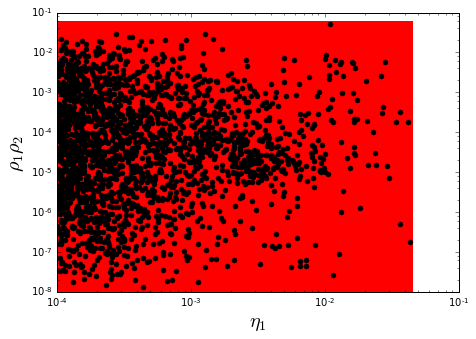

In [5]:
plt.figure(figsize=(7.2,5))
y1=x1d[np.abs(x1d['delta'])<0.2]
y2=y1[y1['mE2']/y1['mE1']>1.1]
y3=y2[np.abs(y2['mu'])<40]
y4=y3[np.abs(y3['alfa'])<0.2]
y2d=y4[y4['mu->e gamma']<5.3e-13]
print 'DM mask', y3.shape
print 'STU angle mask', y4.shape
print 'Satisfy muegamma today', y2d.shape
plt.plot(y2d['y1'],y2d['rho1']*y2d['rho2'],'ko',label= r'$\mathcal{B}(\mu \rightarrow e\gamma)<5.3\times 10^{-13}$',markersize=5)
plt.yscale('log')
plt.xscale('log')
#plt.xlim(1.e-4,1.)
#plt.ylim(1.e-8,1.)
#plt.legend(loc='lower left')
#figsize(15,9)
#figsize(7,5)
plt.xlabel(r'$\eta_1$',size=20)
plt.ylabel(r'$\rho_1\rho_2$',size=20)
x=np.linspace(0.0001,0.045,100)
y=np.linspace(0.06,0.06,100)
#axvline(x=0.05,ymin=0, ymax=0.5)
plt.plot(x,y,'r')
plt.fill_between(x,0.06,0.00000001,color='r')
plt.yscale('log')
plt.xscale('log')

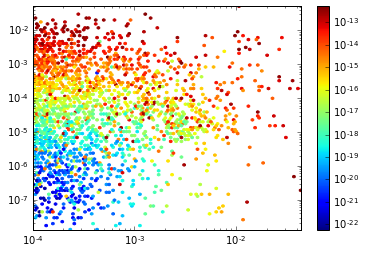

In [19]:
plt.hexbin(y2d['y1'],y2d['rho1']*y2d['rho2'],y2d['mu->e gamma'],yscale='log',xscale='log',norm=LogNorm())
plt.colorbar()

Fix parameters

In [6]:
y2d.shape

(2320, 24)

In [17]:
yf=y2d#[np.logical_and(y2d['mu->e gamma']>1E-16,y2d['mu->e gamma']<1E-15)]
yf=yf[np.logical_and( np.abs(yf.rho1/yf.rho2)>0.5,np.abs(yf.rho1/yf.rho2)<1.5     )]

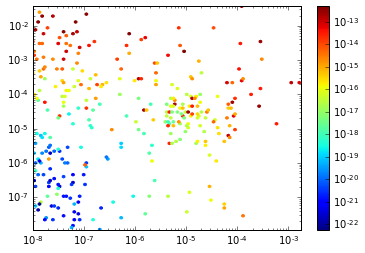

In [19]:
plt.hexbin(yf.y1**2,yf.rho2**2,yf['mu->e gamma'],yscale='log',xscale='log',norm=LogNorm())
plt.colorbar()

Masks

In [25]:
y3d=y2d[np.logical_and(y2d.y1<1E-3,y2d.rho1*y2d.rho2>1E-4)]
y3d=y3d[y3d['mu->e gamma']<1E-18]
y3d

,MD,mf1,mf2,mH,mA,mE1,mE2,mu->e gamma,alfa,delta,...,f2,f3,f1,rho2,rho3,k,I1,I2,mu,Rmuv
15626,1475.771173,1468.313362,1713.567823,815.801971,820.806507,819.357254,1467.362205,1.733923e-21,-0.175276,0.000501,...,0.000639,0.000274,0.000177,0.000796,0.199167,-0.000011,0.471762,0.415514,4.268113,0.017350
57744,885.369701,884.450060,1583.122756,788.259913,791.070786,790.963080,884.156729,2.736570e-20,-0.036288,-0.003149,...,-0.001549,-0.000664,-0.000429,0.271748,0.000184,0.000007,0.107226,0.066440,-2.826219,-0.011489


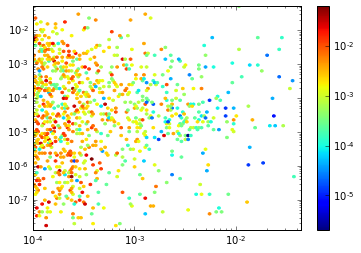

In [26]:
plt.hexbin(y2d['y1'],y2d['rho1']*y2d['rho2'],y2d.delta,yscale='log',xscale='log',norm=LogNorm())
plt.colorbar()

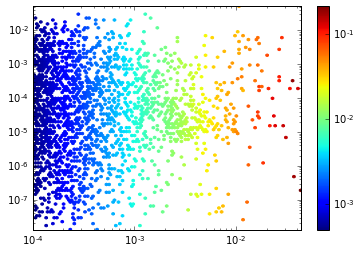

In [28]:
plt.hexbin(y2d['y1'],y2d['rho1']*y2d['rho2'],np.abs(y2d.eta2),yscale='log',xscale='log',norm=LogNorm())
plt.colorbar()

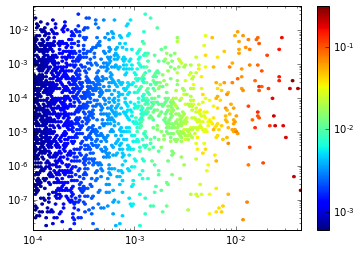

In [29]:
plt.hexbin(y2d['y1'],y2d['rho1']*y2d['rho2'],np.abs(y2d.eta3),yscale='log',xscale='log',norm=LogNorm())
plt.colorbar()

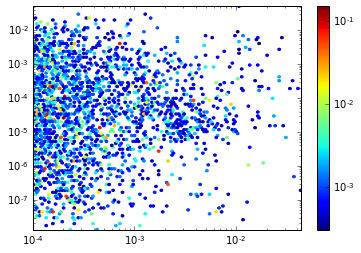

In [31]:
plt.hexbin(y2d['y1'],y2d['rho1']*y2d['rho2'],np.abs(y2d.f2),yscale='log',xscale='log',norm=LogNorm())
plt.colorbar()

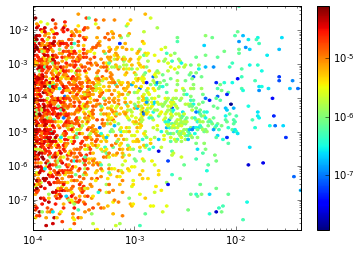

In [38]:
plt.hexbin(y2d['y1'],y2d['rho1']*y2d['rho2'],np.abs(y2d.k),yscale='log',xscale='log',norm=LogNorm())
plt.colorbar()

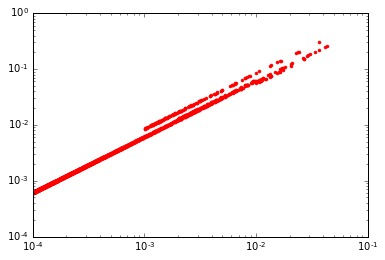

In [46]:
plt.loglog(y2d.y1,np.abs(y2d.eta3),'r.')

Others

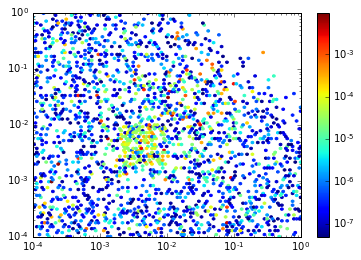

In [72]:
y2d['eta1']=y2d.y1
y4d=y2d#[y2d.eta1>1E-3]
plt.hexbin(np.abs(y4d.rho1),np.abs(y4d.rho2),np.abs(y4d.eta1*y4d.eta2),yscale='log',xscale='log',norm=LogNorm())
plt.colorbar()

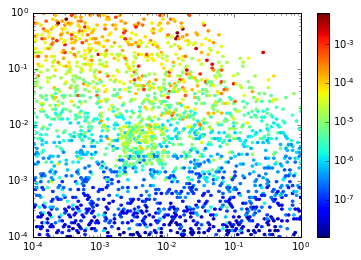

In [71]:
y2d['eta1']=y2d.y1
y4d=y2d#[y2d.eta1>1E-3]
plt.hexbin(np.abs(y4d.rho1),np.abs(y4d.rho2),np.abs(y4d.rho2*y4d.eta1),yscale='log',xscale='log',norm=LogNorm())
plt.colorbar()

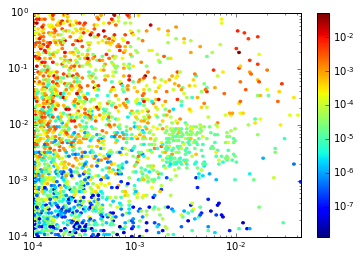

In [75]:
y2d['eta1']=y2d.y1
y4d=y2d#[y2d.eta1>1E-3]
plt.hexbin(np.abs(y4d.eta1),np.abs(y4d.rho2),np.abs(y4d.rho1*y4d.rho2),yscale='log',xscale='log',norm=LogNorm())
plt.colorbar()

In [ ]:
y2d['eta1']=y2d.y1
y4d=y2d[y2d.eta1>1E-3]
plt.hexbin(np.abs(y4d.rho1),np.abs(y4d.rho2),np.abs(y4d.rho1*y4d.rho2),yscale='log',xscale='log')#,norm=LogNorm())
plt.colorbar()

In [6]:
y2d.columns

Index([u'MD', u'mf1', u'mf2', u'mH', u'mA', u'mE1', u'mE2', u'mu->e gamma',
       u'alfa', u'delta', u'y1', u'rho1', u'eta2', u'eta3', u'f2', u'f3',
       u'f1', u'rho2', u'rho3', u'k', u'I1', u'I2', u'mu', u'Rmuv'],
      dtype='object')

DM mask (12845, 24)
STU angle mask (3975, 24)
Satisfy muegamma tomorrow (2091, 24)


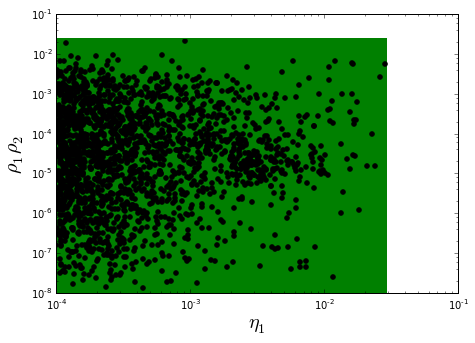

In [80]:
plt.figure(figsize=(7.2,5))
y1=x1d[np.abs(x1d['delta'])<0.2]
y2=y1[y1['mE2']/y1['mE1']>1.1]
y3=y2[np.abs(y2['mu'])<40]
y4=y3[np.abs(y3['alfa'])<0.2]
y2d=y4[y4['mu->e gamma']<6.3e-14]
print 'DM mask', y3.shape
print 'STU angle mask', y4.shape
print 'Satisfy muegamma tomorrow', y2d.shape
plt.plot(y2d['y1'],y2d['rho1']*y2d['rho2'],'ko',label= r'$\mathcal{B}(\mu \rightarrow e\gamma)<6.3\times 10^{-14}$',markersize=5)
plt.yscale('log')
plt.xscale('log')
#plt.xlim(1.e-4,1.)
#plt.ylim(1.e-8,1.)
#plt.legend(loc='lower left')
#figsize(15,9)
#figsize(7,5)
plt.xlabel(r'$\eta_1$',size=20)
plt.ylabel(r'$\rho_1\rho_2$',size=20)
x=np.linspace(0.0001,0.029,100)
y=np.linspace(0.025,0.025,100)
#axvline(x=0.05,ymin=0, ymax=0.5)
plt.plot(x,y,'g')
plt.fill_between(x,0.025,0.00000001,color='g')
plt.yscale('log')
plt.xscale('log')

In [4]:
plt.figure(figsize=(7.2,5))
y1=x1d[np.abs(x1d['delta'])<0.2]
y2=y1[y1['mE2']/y1['mE1']>1.1]
y3=y2[np.abs(y2['mu'])<40]
y4=y3[np.abs(y3['alfa'])<0.2]
y2d=y4[y4['mu->e gamma']<5.3e-13]
z2d=y2d[y2d['mu->e gamma']<6.3e-14]
print 'DM mask', y3.shape
print 'STU angle mask', y4.shape
print 'Satisfy muegamma today', y2d.shape
print 'Satisfy muegamma tomorrow', z2d.shape
plt.plot(y2d['y1'],y2d['rho1']*y2d['rho2'],'ko',label= r'$\mathcal{B}(\mu \rightarrow e\gamma)<5.3\times 10^{-13}$',markersize=5)
plt.plot(z2d['y1'],z2d['rho1']*z2d['rho2'],'b.',label= r'$\mathcal{B}(\mu \rightarrow e\gamma)<6.3\times 10^{-14}$',markersize=5)
plt.yscale('log')
plt.xscale('log')
#plt.xlim(1.e-4,1.)
#plt.ylim(1.e-8,1.)
plt.legend(loc='lower left')
#figsize(15,9)
#figsize(7,5)
plt.xlabel(r'$\eta_1$',size=20)
plt.ylabel(r'$\rho_1\rho_2$',size=20)
x=np.linspace(0.0001,0.045,100)
y=np.linspace(0.06,0.06,100)
x2=np.linspace(0.0001,0.029,100)
y2=np.linspace(0.025,0.025,100)
plt.plot(x,y,'r')
plt.plot(x2,y2,'g')
plt.fill_between(x,0.06,0.00000001,color='r')
plt.fill_between(x2,0.025,0.00000001,color='g')
plt.savefig('/home/longas/Documents/figura.pdf')

DM mask (12845, 24)
STU angle mask (3975, 24)
Satisfy muegamma today (2320, 24)
Satisfy muegamma tomorrow (2091, 24)


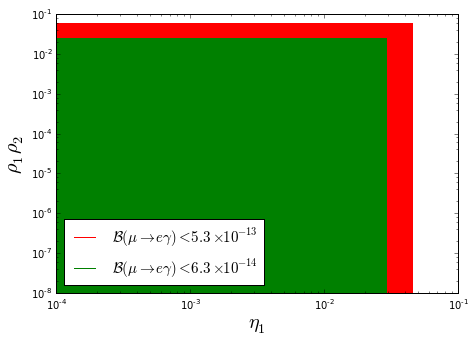

In [89]:
plt.figure(figsize=(7.2,5))
x=np.linspace(0.0001,0.045,100)
y=np.linspace(0.06,0.06,100)
x2=np.linspace(0.0001,0.029,100)
y2=np.linspace(0.025,0.025,100)
plt.plot(x,y,'r',label= r'$\mathcal{B}(\mu \rightarrow e\gamma)<5.3\times 10^{-13}$',markersize=5)
plt.plot(x2,y2,'g',label= r'$\mathcal{B}(\mu \rightarrow e\gamma)<6.3\times 10^{-14}$',markersize=5)
plt.fill_between(x,0.06,0.00000001,color='r')
plt.fill_between(x2,0.025,0.00000001,color='g')
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='lower left',prop={'size':15})
plt.xlabel(r'$\eta_1$',size=20)
plt.ylabel(r'$\rho_1\rho_2$',size=20)
plt.savefig('/home/longas/Documents/Doctorado/Camello/inert_zee_model/3275131xcsfjc/LFVregionhigh.pdf')

(2320,)
(2320,)


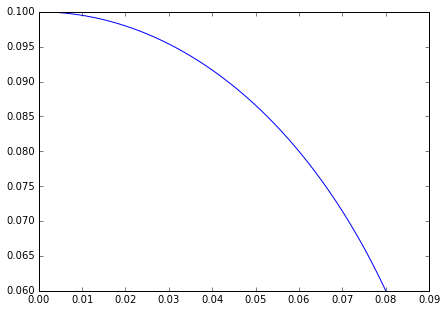

In [25]:
xx=np.linspace(0.0001,0.08,2320)
yy=np.sqrt(0.1**2-xx**2)
print xx.shape
print yy.shape
plt.plot(xx,yy)

DM mask (12845, 24)
STU angle mask (3975, 24)
(2320, 24)


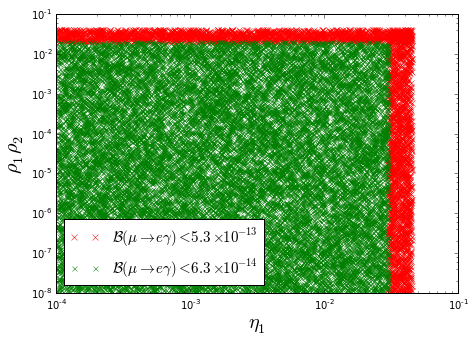

In [12]:
y1=x1d[np.abs(x1d['delta'])<0.2]
y2=y1[y1['mE2']/y1['mE1']>1.1]
y3=y2[np.abs(y2['mu'])<40]
y4=y3[np.abs(y3['alfa'])<0.2]
print 'DM mask', y3.shape
print 'STU angle mask', y4.shape
y2d=y4[y4['mu->e gamma']<5.3e-13]
print y2d.shape
z2d=y2d[y2d['mu->e gamma']<6.3e-14]
#plt.plot(y4['y1'],y4['rho1']*y4['rho2'],'b.',markersize=5)
#plt.plot(y2d['y1'],y2d['rho1']*y2d['rho2'],'r.',label= r'$\mathcal{B}(\mu \rightarrow e\gamma)<5.3\times 10^{-13}$',markersize=5)
#plt.plot(z2d['y1'],z2d['rho1']*z2d['rho2'],'g.',label= r'$\mathcal{B}(\mu \rightarrow e\gamma)<6.3\times 10^{-14}$',markersize=5)
plt.figure(figsize=(7.2,5))
plt.yscale('log')
plt.xscale('log')
#plt.xlim(1.e-4,1.)
#plt.ylim(1.e-8,1.)
#x=y2d['y1']
#y=y2d['rho1']*y2d['rho2']
#plt.plot(x,y,'k.')
plt.xlabel(r'$\eta_1$',size=20)
xx=np.exp(np.random.uniform(np.log(1E-4),np.log(0.045),2000))
yy=np.exp(np.random.uniform(np.log(0.02),np.log(0.04),2000))
zz=np.exp(np.random.uniform(np.log(0.03),np.log(0.045),2000))
tt=np.exp(np.random.uniform(np.log(1E-8),np.log(0.04),2000))
xx1=np.exp(np.random.uniform(np.log(1E-4),np.log(0.03),20000))
yy1=np.exp(np.random.uniform(np.log(1E-8),np.log(0.02),20000))
plt.ylabel(r'$\rho_1\rho_2$',size=20)
plt.plot(zz,tt,'rx')
plt.plot(xx,yy,'rx',label= r'$\mathcal{B}(\mu \rightarrow e\gamma)<5.3\times 10^{-13}$')
plt.plot(xx1,yy1,'gx',label= r'$\mathcal{B}(\mu \rightarrow e\gamma)<6.3\times 10^{-14}$',markersize=5)
plt.legend(loc='lower left',prop={'size':15})
plt.savefig('/home/longas/Documents/Doctorado/Camello/inert_zee_model/3275131xcsfjc/LFVregionhigh.pdf')

DM mask (12845, 24)
STU angle mask (3975, 24)
(2320, 24)


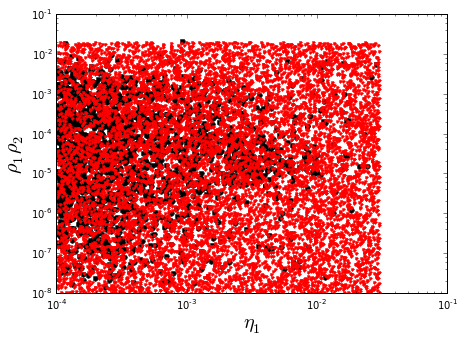

In [94]:
y1=x1d[np.abs(x1d['delta'])<0.2]
y2=y1[y1['mE2']/y1['mE1']>1.1]
y3=y2[np.abs(y2['mu'])<40]
y4=y3[np.abs(y3['alfa'])<0.2]
print 'DM mask', y3.shape
print 'STU angle mask', y4.shape
y2d=y4[y4['mu->e gamma']<5.3e-13]
print y2d.shape
z2d=y2d[y2d['mu->e gamma']<6.3e-14]
#plt.plot(y4['y1'],y4['rho1']*y4['rho2'],'b.',markersize=5)
#plt.plot(y2d['y1'],y2d['rho1']*y2d['rho2'],'r.',label= r'$\mathcal{B}(\mu \rightarrow e\gamma)<5.3\times 10^{-13}$',markersize=5)
#plt.plot(z2d['y1'],z2d['rho1']*z2d['rho2'],'g.',label= r'$\mathcal{B}(\mu \rightarrow e\gamma)<6.3\times 10^{-14}$',markersize=5)
plt.yscale('log')
plt.xscale('log')
#plt.xlim(1.e-4,1.)
#plt.ylim(1.e-8,1.)
x=z2d['y1']
y=z2d['rho1']*z2d['rho2']
plt.plot(x,y,'k.',markersize=10)
#plt.legend(loc='upper right')
#figsize(15,9)
figsize(7,5)
plt.xlabel(r'$\eta_1$',size=20)
xx=np.exp(np.random.uniform(np.log(1E-4),np.log(0.03),10000))
yy=np.exp(np.random.uniform(np.log(1E-8),np.log(0.02),10000))
plt.ylabel(r'$\rho_1\rho_2$',size=20)
plt.plot(xx,yy,'r.')
#np.savetxt('LFVtodaylimit_IDMSTcuts.txt',zz)
#plt.fill_between(x,0,0.05,where=np.logical_and(x>0.0001,x<0.1),color='red')
#plt.fill_betweenx(y,0.045,0.0001,color='red')

DM mask (12845, 24)
STU angle mask (3975, 24)
(2320, 24)


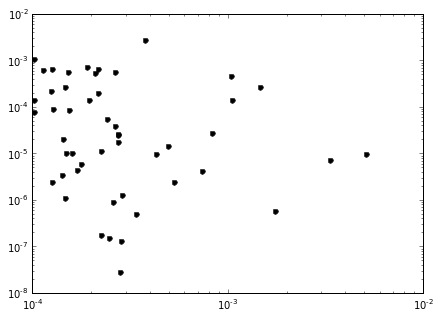

In [108]:
y1=x1d[np.abs(x1d['delta'])<0.2]
y2=y1[y1['mE2']/y1['mE1']>1.1]
y3=y2[np.abs(y2['mu'])<40]
y4=y3[np.abs(y3['alfa'])<0.2]
print 'DM mask', y3.shape
print 'STU angle mask', y4.shape
y2d=y4[y4['mu->e gamma']<5.3e-13]
print y2d.shape
z2d=y2d[y2d['mu->e gamma']<6.3e-14]
#plt.xlim(1.e-4,1.)
#plt.ylim(1.e-8,1.)
x=z2d['y1']
y=z2d['rho1']*z2d['rho2']
#fig, (ax1, ax2) = plt.subplots(ncols=2)
#ax1.plot(x,y,'k.',markersize=10)
#plt.legend(loc='upper right')
#figsize(15,9)
#figsize(7,5)
#plt.xlabel(r'$\eta_1$',size=20)
#xx=np.exp(np.random.uniform(np.log(1E-4),np.log(0.03),10000))
#yy=np.exp(np.random.uniform(np.log(1E-8),np.log(0.02),10000))
#plt.ylabel(r'$\rho_1\rho_2$',size=20)
indexs_to_order_by = x.argsort()
x_ordered = x[indexs_to_order_by]
y_ordered = y[indexs_to_order_by]
plt.plot(x_ordered, y_ordered, 'k.',markersize=10)
plt.yscale('log')
plt.xscale('log')
#plt.plot(x_ordered, y_ordered, 'k.',markersize=10)
#plt.plot(xx,yy,'r.')
#np.savetxt('LFVtodaylimit_IDMSTcuts.txt',zz)
#plt.fill_between(x,0,0.05,where=np.logical_and(x>0.0001,x<0.1),color='red')
#plt.fill_betweenx(y,0.045,0.0001,color='red')

DM mask (12845, 24)
STU angle mask (3975, 24)
(2320,)
(2320,)


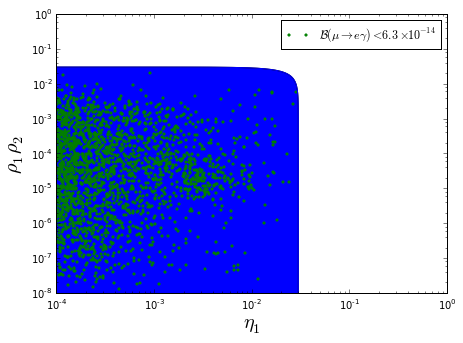

In [52]:
y1=x1d[np.abs(x1d['delta'])<0.2]
y2=y1[y1['mE2']/y1['mE1']>1.1]
y3=y2[np.abs(y2['mu'])<40]
y4=y3[np.abs(y3['alfa'])<0.2]
print 'DM mask', y3.shape
print 'STU angle mask', y4.shape
y2d=y4[y4['mu->e gamma']<5.3e-13]
z2d=y2d[y2d['mu->e gamma']<6.3e-14]
#plt.plot(y4['y1'],y4['rho1']*y4['rho2'],'b.',markersize=5)
#plt.plot(y2d['y1'],y2d['rho1']*y2d['rho2'],'r.',label= r'$\mathcal{B}(\mu \rightarrow e\gamma)<5.3\times 10^{-13}$',markersize=5)
plt.plot(z2d['y1'],z2d['rho1']*z2d['rho2'],'g.',label= r'$\mathcal{B}(\mu \rightarrow e\gamma)<6.3\times 10^{-14}$',markersize=5)
plt.yscale('log')
plt.xscale('log')
xx=np.linspace(0.0001,0.03,2320)
yy=np.sqrt(0.03**2-xx**2)
print xx.shape
print yy.shape
plt.plot(xx,yy)
plt.xlim(1.e-4,1.)
plt.ylim(1.e-8,1.)
plt.legend(loc='upper right')
#figsize(15,9)
figsize(7,5)
plt.fill_between(xx,yy)
plt.xlabel(r'$\eta_1$',size=20)
plt.ylabel(r'$\rho_1\rho_2$',size=20)
#plt.fill_between(z2d['y1']-y2d['y1'],z2d['rho1']*z2d['rho2']-y2d['rho1']*y2d['rho2'])
#plt.fill_between(z2d['y1'],z2d['rho1']*z2d['rho2'],z2d['rho1']*z2d['rho2'],where=np.logical_and(z2d['y1']<0.1,z2d['rho1']*z2d['rho2']<0.1),interpolate=False)

DM mask (9865, 24)
STU splitting mask (4304, 24)


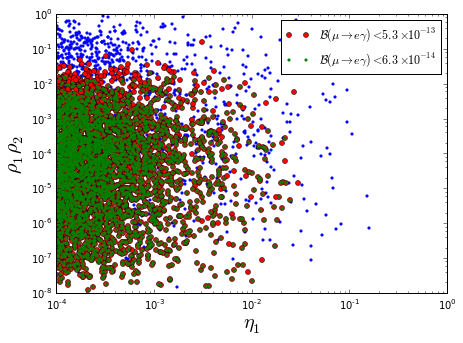

In [4]:
y1=x1d[np.abs(x1d['delta'])<0.2]
y2=y1[y1['mE2']/y1['mE1']>1.1]
y3=y2[np.abs(y2['mu'])<40]
y4=y3[y3['mf2']-y3['mf1']<200.]
print 'DM mask', y3.shape
print 'STU splitting mask', y4.shape
y2d=y4[y4['mu->e gamma']<5.3e-13]
z2d=y2d[y2d['mu->e gamma']<6.3e-14]
plt.plot(y4['y1'],y4['rho1']*y4['rho2'],'b.',markersize=5)
plt.plot(y2d['y1'],y2d['rho1']*y2d['rho2'],'ro',label= r'$\mathcal{B}(\mu \rightarrow e\gamma)<5.3\times 10^{-13}$',markersize=5)
plt.plot(z2d['y1'],z2d['rho1']*z2d['rho2'],'g.',label= r'$\mathcal{B}(\mu \rightarrow e\gamma)<6.3\times 10^{-14}$',markersize=5)
plt.yscale('log')
plt.xscale('log')
plt.xlim(1.e-4,1.)
#plt.ylim(1.e-8,0.1)
plt.legend(loc='upper right')
#figsize(15,9)
figsize(7,5)
plt.xlabel(r'$\eta_1$',size=20)
plt.ylabel(r'$\rho_1\rho_2$',size=20)
#plt.savefig('rho12eta1_pimedios.eps')

DM mask (9578, 24)
STU angle mask (2758, 24)


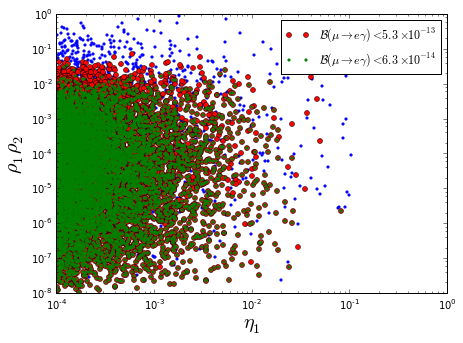

In [6]:
y1=x2d[np.abs(x2d['delta'])<0.2]
y2=y1[y1['mE2']/y1['mE1']>1.1]
y3=y2[np.abs(y2['mu'])<40]
y4=y3[np.abs(y3['alfa'])<0.2]
print 'DM mask', y3.shape
print 'STU angle mask', y4.shape
y2d=y3[y3['mu->e gamma']<5.3e-13]
z2d=y2d[y2d['mu->e gamma']<6.3e-14]
plt.plot(y4['y1'],y4['rho1']*y4['rho2'],'b.',markersize=5)
plt.plot(y2d['y1'],y2d['rho1']*y2d['rho2'],'ro',label= r'$\mathcal{B}(\mu \rightarrow e\gamma)<5.3\times 10^{-13}$',markersize=5)
plt.plot(z2d['y1'],z2d['rho1']*z2d['rho2'],'g.',label= r'$\mathcal{B}(\mu \rightarrow e\gamma)<6.3\times 10^{-14}$',markersize=5)
plt.yscale('log')
plt.xscale('log')
plt.xlim(1.e-4,1.)
#plt.ylim(1.e-8,0.1)
plt.legend(loc='upper right')
#figsize(15,9)
figsize(7,5)
plt.xlabel(r'$\eta_1$',size=20)
plt.ylabel(r'$\rho_1\rho_2$',size=20)
#plt.savefig('rho12eta1_pimedios.eps')

DM mask (9578, 24)
STU splitting mask (4210, 24)


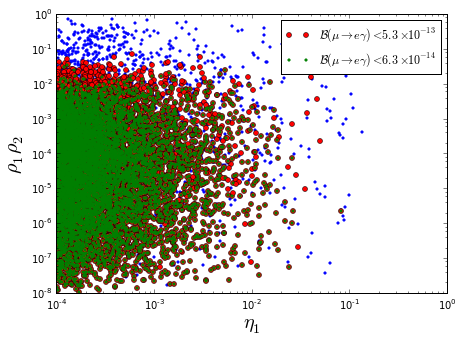

In [5]:
y1=x2d[np.abs(x2d['delta'])<0.2]
y2=y1[y1['mE2']/y1['mE1']>1.1]
y3=y2[np.abs(y2['mu'])<40]
y4=y3[y3['mf2']-y3['mf1']<200.]
print 'DM mask', y3.shape
print 'STU splitting mask', y4.shape
y2d=y3[y3['mu->e gamma']<5.3e-13]
z2d=y2d[y2d['mu->e gamma']<6.3e-14]
plt.plot(y4['y1'],y4['rho1']*y4['rho2'],'b.',markersize=5)
plt.plot(y2d['y1'],y2d['rho1']*y2d['rho2'],'ro',label= r'$\mathcal{B}(\mu \rightarrow e\gamma)<5.3\times 10^{-13}$',markersize=5)
plt.plot(z2d['y1'],z2d['rho1']*z2d['rho2'],'g.',label= r'$\mathcal{B}(\mu \rightarrow e\gamma)<6.3\times 10^{-14}$',markersize=5)
plt.yscale('log')
plt.xscale('log')
plt.xlim(1.e-4,1.)
#plt.ylim(1.e-8,0.1)
plt.legend(loc='upper right')
#figsize(15,9)
figsize(7,5)
plt.xlabel(r'$\eta_1$',size=20)
plt.ylabel(r'$\rho_1\rho_2$',size=20)
#plt.savefig('rho12eta1_pimedios.eps')

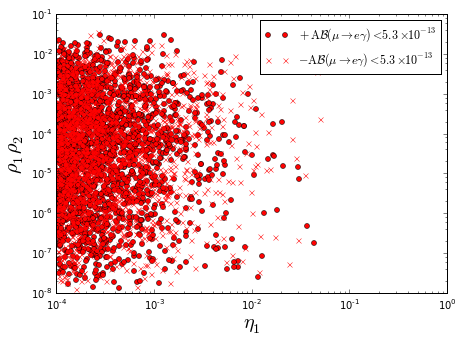

In [14]:
y1=x1d[np.abs(x1d['delta'])<0.2]
y2=y1[y1['mE2']/y1['mE1']>1.1]
y3=y2[np.abs(y2['mu'])<40]
y4=y3[np.abs(y3['alfa'])<0.2]
y11=x2d[np.abs(x2d['delta'])<0.2]
y22=y11[y11['mE2']/y11['mE1']>1.1]
y33=y22[np.abs(y22['mu'])<40]
y44=y33[np.abs(y33['alfa'])<0.2]
y2d=y4[y4['mu->e gamma']<5.3e-13]
y22d=y44[y44['mu->e gamma']<5.3e-13]
plt.plot(y2d['y1'],y2d['rho1']*y2d['rho2'],'ro',label= r'${\rm +A}\mathcal{B}(\mu \rightarrow e\gamma)<5.3\times 10^{-13}$',markersize=5)
plt.plot(y22d['y1'],y22d['rho1']*y22d['rho2'],'rx',label= r'${\rm -A}\mathcal{B}(\mu \rightarrow e\gamma)<5.3\times 10^{-13}$',markersize=5)
plt.yscale('log')
plt.xscale('log')
plt.xlim(1.e-4,1.)
#plt.ylim(1.e-8,0.1)
plt.legend(loc='upper right')
#figsize(15,9)
figsize(7,5)
plt.xlabel(r'$\eta_1$',size=20)
plt.ylabel(r'$\rho_1\rho_2$',size=20)